## Love Songs On The Radio
### Jonby
---

This notebook walks through a fun exercise to find all songs throughout Billboard's history that include some variant of "Love" in the title.

In [2]:
import billboard
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[billboard](https://github.com/guoguo12/billboard-charts) is an unofficial Python API for accessing the Billboard charts in an easily readable way. 

In [3]:
chart = billboard.ChartData('hot-100')
#chart

Using the `love.py` script, I walked through all Billboard Hot 100 charts and created a dataframe with all songs containing some variant of "love" in the title, along with the artist, year, and the number of weeks that song appeared on the charts for the given year.

In [3]:
lovedf = pd.read_csv('data/lovedf.csv', index_col= 0)
#lovedf

First, the number of unique "Love" songs that appeared on the charts for every year.

In [22]:
yearcount = lovedf.groupby("Year").size()

In [23]:
yearcountdf = yearcount.to_frame(name = 'Yearcount')

In [24]:
yearcountdf.reset_index(inplace=True)

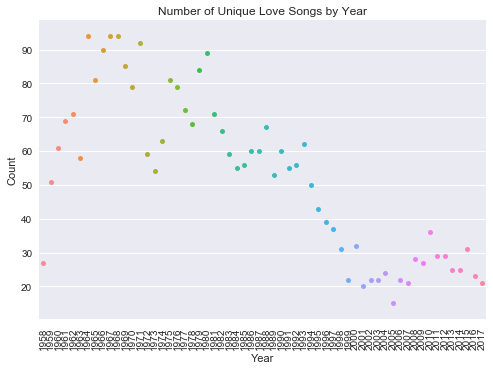

In [51]:
yearplot = sns.stripplot(data = yearcountdf, x = "Year", y = "Yearcount")
yearplot.set_xticklabels(labels = yearcountdf["Year"], rotation = 90)
plt.title("Number of Unique Love Songs by Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show(yearplot)

What about the song with the longest staying power for every year?

In [46]:
#lovedf[lovedf.groupby("Year")['Count'] == lovedf.groupby("Year")['Count'].max()]

Has the average staying power for songs changed over time? If so, this *could* explain (in part) the drop in the number of unique 'love' songs over time.


In [25]:
avgyearcountdf = lovedf.groupby("Year").mean()
avgyearcountdf.reset_index(inplace = True)

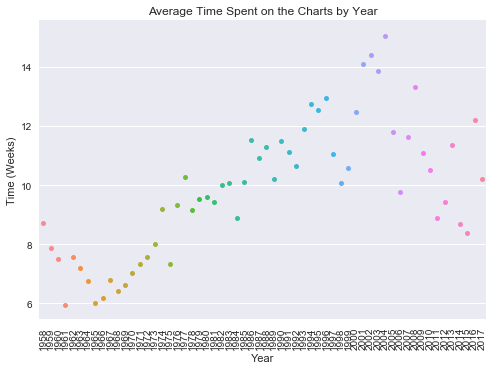

In [44]:
avgyearcountplot = sns.stripplot(data = avgyearcountdf, x = "Year", y = "Count")
avgyearcountplot.set_xticklabels(labels = avgyearcountdf["Year"], rotation = 90)
plt.title("Average Time Spent on the Charts by Year")
plt.ylabel("Time (Weeks)")
plt.xlabel("Year")
plt.show(avgyearcountplot)

Negative correlation between average chart count and number of unique songs on the chart?

In [26]:
yearcomparedf = avgyearcountdf.merge(yearcountdf)
yearcomparedf.columns = ['year', 'mean_chart_stay', 'nunique']

In [45]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}